### 1. Import library

In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization, LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import model_from_yaml

In [2]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [3]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0" 

### 2. EDA

In [23]:
################################
###  need update new labels  ###
################################

path = "./img/train"
class_names = ['battery', 'cardboard','clothes','glass', 'human', 'metal','paper', 'phone', 'plastic']
total = 0

for name in class_names:
    name_path = os.path.join(path, name)
    num = len(os.listdir(name_path))
    total += num
    print("Number of " + name + " image:" + str(num))

print("Total number of image: " + str(total))

Number of battery image:357
Number of cardboard image:402
Number of clothes image:332
Number of glass image:459
Number of human image:448
Number of metal image:342
Number of paper image:293
Number of phone image:508
Number of plastic image:331
Total number of image: 3472


### 3. Pre-processing

In [25]:
batch_size = 128
epochs = 20
IMG_HEIGHT = 150
IMG_WIDTH = 150
split = 0.2
total_val = total * split
total_train = total - total_val
print("Total number of training set: " + str(total_train))
print("Total number of validation set: " + str(total_val))

Total number of training set: 2777.6
Total number of validation set: 694.4000000000001


In [26]:
data_generator = ImageDataGenerator(rescale=1./255,
                                    validation_split=split,
                                    rotation_range=45,
                                    width_shift_range=.15,
                                    height_shift_range=.15,
                                    horizontal_flip=True,
                                    zoom_range=0.5
                                   )

In [27]:
train_generator = data_generator.flow_from_directory(directory=path,
                                                    target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                    batch_size=batch_size,
                                                    class_mode='sparse',
                                                    shuffle=True,
                                                    subset='training')

validation_generator = data_generator.flow_from_directory(directory=path,
                                                    target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                    batch_size=batch_size,
                                                    class_mode='sparse',
                                                    shuffle=True,
                                                    subset='validation')

Found 2782 images belonging to 9 classes.
Found 690 images belonging to 9 classes.


In [28]:
labels = (train_generator.class_indices)
print(labels)

{'battery': 0, 'cardboard': 1, 'clothes': 2, 'glass': 3, 'human': 4, 'metal': 5, 'paper': 6, 'phone': 7, 'plastic': 8}


### 4. Visualisation

In [19]:
def plotImg(img, label):
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(img[i])
        plt.xlabel(class_names[int(label[i])])
    plt.show()

In [29]:
sample_img_train, sample_label_train = next(train_generator)

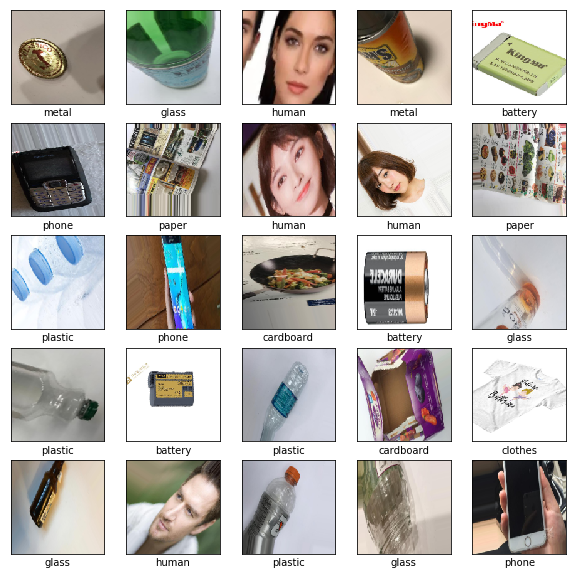

In [30]:
plotImg(sample_img_train, sample_label_train)

### 5. Model

In [31]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(9, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = total_train // batch_size,
    epochs = 5,  ##epochs
    validation_data = validation_generator,
    validation_steps = total_val // batch_size
)

Epoch 1/5


C:\Users\ABC\Anaconda3\lib\site-packages\PIL\Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


21/21 [==============================] - 34s 2s/step - loss: 2.7755 - acc: 0.1451 - val_loss: 2.0987 - val_acc: 0.2297
Epoch 2/5
 4/21 [====>.........................] - ETA: 19s - loss: 2.0569 - acc: 0.2520

KeyboardInterrupt: 

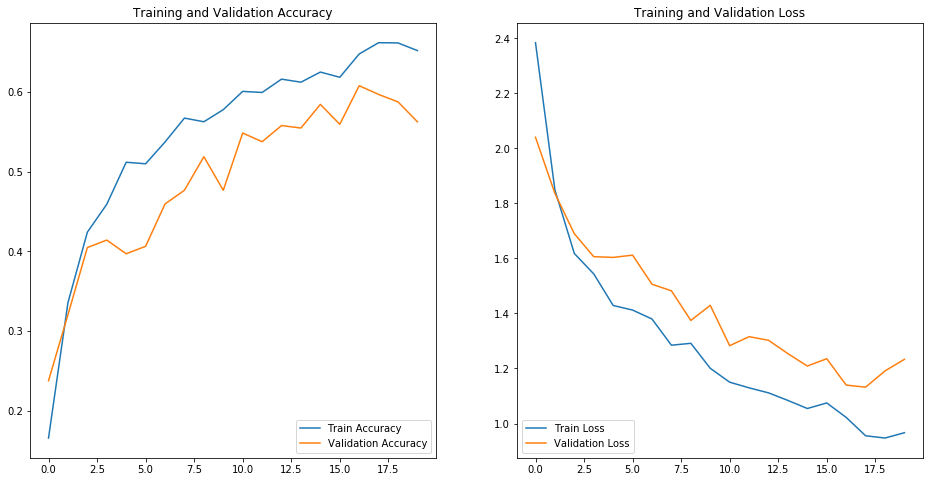

In [54]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='lower left')
plt.title('Training and Validation Loss')

plt.show()

In [72]:
model = Sequential([
    Conv2D(16, 3, padding='same', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    LeakyReLU(alpha=0.1),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same'),
    LeakyReLU(alpha=0.1),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same'),
    LeakyReLU(alpha=0.1),
    MaxPooling2D(),
    Flatten(),
    Dense(256),
    LeakyReLU(alpha=0.1),
    Dense(9, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [73]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = total_train // batch_size,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = total_val // batch_size
)

Epoch 1/20
 6/26 [=====>........................] - ETA: 24s - loss: nan - acc: 0.0784

C:\Users\ABC\Anaconda3\lib\site-packages\PIL\Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


18/26 [===================>..........] - ETA: 10s - loss: nan - acc: 0.0769

KeyboardInterrupt: 